In this notebook we use support vector machines (SVMs) to learn a model that can distinguish between the spam data (food reviews) and legitimate data (Austen). 

We begin by loading in the feature vectors which we generated in either notebook [02-feature-engineering](02-feature-engineering.ipynb) or notebook [02a-feature-engineering](02a-feature-engineering.ipynb). 

In [1]:
import pandas as pd

feats = pd.read_parquet("data/tfidf_features.parquet")

/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [2]:
feats.sample(10)

,index,label,0,1,2,3,4,5,6,7,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
30978,10978,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37684,17684,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36225,16225,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6489,6489,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35846,15846,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,1483,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16162,16162,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26139,6139,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26276,6276,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26696,6696,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn import model_selection
train, test = model_selection.train_test_split(feats)

In [4]:
from sklearn import svm

In [5]:
clf = svm.SVC(kernel = 'linear')

In [6]:
type(train)

pandas.core.frame.DataFrame

In [9]:
train1 = train.iloc[:,2:8002]

In [10]:
import time

start = time.time()
clf.fit(X=train1, y=train["label"])
end = time.time()
print(end - start)


1219.2369902133942


In [11]:
test_pred = clf.predict(test.iloc[:,2:8002])

In [12]:
test_pred

array(['legitimate', 'legitimate', 'legitimate', ..., 'legitimate',
       'spam', 'legitimate'], dtype=object)

In [13]:
from sklearn import metrics

In [14]:
metrics.accuracy_score(test["label"], test_pred)

0.9828

In [15]:
metrics.recall_score(test["label"], test_pred, pos_label="spam")

0.9929915899078895

In [16]:
metrics.precision_score(test["label"], test_pred, pos_label="spam")

0.973116169544741

In [17]:
from mlworkflows import plot

In [18]:
df, chart = plot.binary_confusion_matrix(test["label"], test_pred)

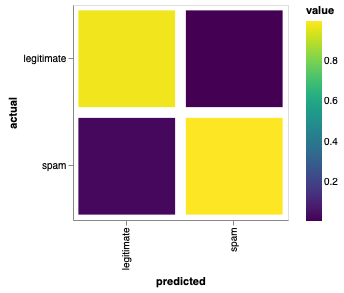

In [19]:
chart

In [20]:
df

,actual,predicted,raw_count,value
0,legitimate,legitimate,4869,0.972633
1,spam,legitimate,137,0.027367
2,legitimate,spam,35,0.007008
3,spam,spam,4959,0.992992


In [21]:
from sklearn.metrics import classification_report
print(classification_report(test.label.values, test_pred))

              precision    recall  f1-score   support

  legitimate       0.99      0.97      0.98      5006
        spam       0.97      0.99      0.98      4994

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

